In [39]:
# define the system
from IPython.display import display
from matplotlib import pyplot as plt
import ipywidgets as ipyw
import numpy as np

tRange = np.arange(0,10.01,.01)
sigmaRange = np.arange(-10,10.01,.01)
omegaRange = np.arange(-10,10.01,.01)

def y(x):
    return(np.exp(-0.1*x) * np.sin(x))

def Y(s):
    return(1 / s)

tValue0 = 0
yValue0 = y(tValue0)

sigmaValue0 = 1
omegaValue0 = 1

In [40]:
# sliders and whatnot
tSlider = ipyw.FloatSlider(
    value=tValue0,
    min=tRange[0],
    max=tRange[-1],
    description='$t$:',
    disabled=False,
    readout=True,
    readout_format='.2f',
    layout=ipyw.Layout(width='100%', height='80px'), 
    step=0.01,
)

sigmaSlider = ipyw.FloatSlider(
    value=sigmaValue0,
    min=sigmaRange[0],
    max=sigmaRange[-1],
    description='$\sigma$:',
    disabled=False,
    readout=True,
    readout_format='.2f',
    layout=ipyw.Layout(width='100%', height='80px'), 
    step=0.01,
)

omegaSlider = ipyw.FloatSlider(
    value=omegaValue0,
    min=omegaRange[0],
    max=omegaRange[-1],
    description='$\omega$:',
    disabled=False,
    readout=True,
    readout_format='.2f',
    layout=ipyw.Layout(width='100%', height='80px'), 
    step=0.01,
)

In [42]:
%matplotlib widget
# initialize plot
font = {'family' : 'times new roman',
        'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

fig, ax = plt.subplots(nrows=1, ncols=2)

# draw plot
ax[0].set_xlim(sigmaRange[0], sigmaRange[-1])
ax[0].set_ylim(omegaRange[0], omegaRange[-1])
hInput = ax[0].scatter(sigmaValue0, omegaValue0, 50);
output0 = Y(sigmaValue0 + 1j * omegaValue0)
hOutput = ax[1].scatter(output0.real, output0.imag, 50);
ax[1].set_xlim(-10, 10)
ax[1].set_ylim(-10, 10)

def handle_sigmaSlider_change(change):
    sigmaValue = change['new']
    omegaValue = omegaSlider.value
    updateInputOutputPlots(sigmaValue, omegaValue)
    #hText.set_position((tValue, yValue))
    #hText.set_text(' ${:.3f}$'.format(yValue))
def handle_omegaSlider_change(change):
    sigmaValue = sigmaSlider.value
    omegaValue = change['new']
    updateInputOutputPlots(sigmaValue, omegaValue)
    #hText.set_position((tValue, yValue))
    #hText.set_text(' ${:.3f}$'.format(yValue))
    
def updateInputOutputPlots(sigmaValue, omegaValue):
    hInput.set_offsets((sigmaValue, omegaValue))
    output = Y(sigmaValue + 1j * omegaValue)
    hOutput.set_offsets((output.real, output.imag))
    
sigmaSlider.observe(handle_sigmaSlider_change, names='value')
omegaSlider.observe(handle_omegaSlider_change, names='value')

display(ipyw.VBox([sigmaSlider, omegaSlider]))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:
%matplotlib widget
# initialize plot
font = {'family' : 'times new roman',
        'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)
fig = plt.figure()
ax = fig.gca()

# draw plot
hPlot = ax.plot(tRange, y(tRange), linewidth=2, label='$y$');
hScatter = ax.scatter(tValue0, yValue0, 50)
hText = ax.text(tValue0, yValue0, ' ${:.3f}$'.format(yValue0))
ax.set_xlabel('$t$');
ax.set_ylabel('$y(t)$');
plt.legend(loc="best");

def handle_tSlider_change(change):
    tValue = change['new']
    yValue = y(tValue)
    hScatter.set_offsets((tValue, yValue))
    hText.set_position((tValue, yValue))
    hText.set_text(' ${:.3f}$'.format(yValue))
tSlider.observe(handle_tSlider_change, names='value')

display(ipyw.HBox([tSlider]))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [38]:
x = range(10)
y = range(10)

fig, ax = plt.subplots(nrows=1, ncols=2)

#ax[0, 0].plot(range(10), 'r') #row=0, col=0
ax[0].plot(range(10), 'b') #row=1, col=0
#ax[0, 1].plot(range(10), 'g') #row=0, col=1
ax[1].plot(range(10), 'k') #row=1, col=1
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## linking

In [62]:
a = ipyw.FloatText()
b = ipyw.FloatSlider()
display(a,b)

mylink = ipyw.jslink((a, 'value'), (b, 'value'))

FloatText(value=0.0)

FloatSlider(value=0.0)

## sympy laplace transform test

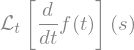

In [19]:
import sympy as sy
from sympy.abc import t, s, a
sy.init_printing()
f = sy.Function('f')
sy.laplace_transform(f(t).diff(), t, s)

## draggable points in matplotlib example 
https://stackoverflow.com/questions/50439506/dragging-points-in-matplotlib-interactive-plot

In [57]:
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.interpolate as inter
import numpy as np

func = lambda x: 0.1*x**2

#get a list of points to fit a spline to as well
N = 10
xmin = 0 
xmax = 10 
x = np.linspace(xmin,xmax,N)

#spline fit
yvals = func(x)
spline = inter.InterpolatedUnivariateSpline (x, yvals)

#figure.subplot.right
mpl.rcParams['figure.subplot.right'] = 0.8

#set up a plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


pind = None #active point
epsilon = 5 #max pixel distance

def update(val):
    global yvals
    global spline
    # update curve
    for i in np.arange(N):
      yvals[i] = sliders[i].val 
    l.set_ydata(yvals)
    spline = inter.InterpolatedUnivariateSpline (x, yvals)
    m.set_ydata(spline(X))
    # redraw canvas while idle
    fig.canvas.draw_idle()

def reset(event):
    global yvals
    global spline
    #reset the values
    yvals = func(x)
    for i in np.arange(N):
      sliders[i].reset()
    spline = inter.InterpolatedUnivariateSpline (x, yvals)
    l.set_ydata(yvals)
    m.set_ydata(spline(X))
    # redraw canvas while idle
    fig.canvas.draw_idle()

def button_press_callback(event):
    'whenever a mouse button is pressed'
    global pind
    if event.inaxes is None:
        return
    if event.button != 1:
        return
    #print(pind)
    pind = get_ind_under_point(event)    

def button_release_callback(event):
    'whenever a mouse button is released'
    global pind
    if event.button != 1:
        return
    pind = None

def get_ind_under_point(event):
    'get the index of the vertex under point if within epsilon tolerance'

    # display coords
    #print('display x is: {0}; display y is: {1}'.format(event.x,event.y))
    t = ax1.transData.inverted()
    tinv = ax1.transData 
    xy = t.transform([event.x,event.y])
    #print('data x is: {0}; data y is: {1}'.format(xy[0],xy[1]))
    xr = np.reshape(x,(np.shape(x)[0],1))
    yr = np.reshape(yvals,(np.shape(yvals)[0],1))
    xy_vals = np.append(xr,yr,1)
    xyt = tinv.transform(xy_vals)
    xt, yt = xyt[:, 0], xyt[:, 1]
    d = np.hypot(xt - event.x, yt - event.y)
    indseq, = np.nonzero(d == d.min())
    ind = indseq[0]

    #print(d[ind])
    if d[ind] >= epsilon:
        ind = None

    #print(ind)
    return ind

def motion_notify_callback(event):
    'on mouse movement'
    global yvals
    if pind is None:
        return
    if event.inaxes is None:
        return
    if event.button != 1:
        return

    #update yvals
    #print('motion x: {0}; y: {1}'.format(event.xdata,event.ydata))
    yvals[pind] = event.ydata 

    # update curve via sliders and draw
    sliders[pind].set_val(yvals[pind])
    fig.canvas.draw_idle()

X = np.arange(0,xmax+1,0.1)
ax1.plot (X, func(X), 'k--', label='original')
l, = ax1.plot (x,yvals,color='k',linestyle='none',marker='o',markersize=8)
m, = ax1.plot (X, spline(X), 'r-', label='spline')



ax1.set_yscale('linear')
ax1.set_xlim(0, xmax)
ax1.set_ylim(0,xmax)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=2,prop={'size':22})

sliders = []

for i in np.arange(N):

    axamp = plt.axes([0.84, 0.8-(i*0.05), 0.12, 0.02])
    # Slider
    s = Slider(axamp, 'p{0}'.format(i), 0, 10, valinit=yvals[i])
    sliders.append(s)


for i in np.arange(N):
    #samp.on_changed(update_slider)
    sliders[i].on_changed(update)

axres = plt.axes([0.84, 0.8-((N)*0.05), 0.12, 0.02])
bres = Button(axres, 'Reset')
bres.on_clicked(reset)

fig.canvas.mpl_connect('button_press_event', button_press_callback)
fig.canvas.mpl_connect('button_release_event', button_release_callback)
fig.canvas.mpl_connect('motion_notify_event', motion_notify_callback)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …